# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime, timedelta

# Import the OpenWeatherMap API key
from api_keys import openweather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    country_code = city.country_code.upper()
    
    # If the city is unique, then add it to a our cities list
    if not any((check['name'] == city.city_name and check['country'] == country_code) for check in cities):
        cities.append({"name": city.city_name, "country": country_code, "lat":lat_lng[0] , "lon": lat_lng[1]})

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Base URL OpenWeather API                         
openweather_url = "http://api.openweathermap.org/data/2.5/weather"

# Counter to go through data
record_count = 1
set_count = 1

# Create DataFrame
weather_data_df = pd.DataFrame()

weather_data_df["City"] = ""
weather_data_df["Country"] = ""
weather_data_df["Date"] = ""      
weather_data_df["Latitude"] = ""
weather_data_df["Longitude"] = ""
weather_data_df["Cloudiness (%)"] = ""
weather_data_df["Humidity (%)"] = ""
weather_data_df["Max Temp (F)"] = ""
weather_data_df["Wind Speed (mph)"] = ""

# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0

    try:
        # Query URL for the current city
        #query_url = f"{n1}! This is {n2}"
        lat=city["lat"]
        lon=city["lon"]
        query_url = f"{openweather_url}?lat={lat}&lon={lon}&appid={openweather_api_key}"
        
        # Log the url, record, and set numbers
        print("Processing Record %s of Set %s | %s" % (record_count, set_count, city["name"]))
        print("Query URL: %s", query_url)

        # Add 1 to the record count
        record_count += 1
        
        weather_response = requests.get(query_url).json()
 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        weather_data_df.loc[index, "City"] = city["name"]     
        weather_data_df.loc[index, "Country"] = city["country"]     
        weather_data_df.loc[index, "Date"] = datetime.fromtimestamp(weather_response["dt"]) + timedelta(seconds=weather_response["timezone"])
        weather_data_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_data_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_data_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_data_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_data_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_data_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
   
    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping... ")
        print(e)
        pass 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | oak ridge
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=36.13760421064535&lon=-84.51587235697258&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 2 of Set 1 | buraydah
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=26.41929778110554&lon=44.95080331444035&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 3 of Set 1 | hithadhoo
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-6.849675950966471&lon=70.84342073007238&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 4 of Set 1 | korla
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=37.62421453473901&lon=87.65265960265884&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 5 of Set 1 | bluff
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-75.57728409987142&lon=169.77141530024062&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 6 of Se

Processing Record 45 of Set 1 | kabo
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=7.182713371721917&lon=18.94844194225803&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 46 of Set 1 | samalaeulu
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-5.013519899708314&lon=-167.89347307855417&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 47 of Set 1 | hermanus
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-51.75759615005704&lon=9.506412199823671&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 48 of Set 1 | tagusao
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=11.30566942764763&lon=116.4570484292197&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 49 of Set 1 | cedar city
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=38.776686146972196&lon=-114.30841556689207&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 50 of Set 1 | lebu
Query URL: %s http://api.openwea

Processing Record 38 of Set 2 | cabedelo
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-4.900452621002501&lon=-25.89109292268543&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 39 of Set 2 | blackwater
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-24.271991655365895&lon=148.85270514018316&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 40 of Set 2 | illoqqortoormiut
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=79.43719954309014&lon=-20.023822345556283&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 41 of Set 2 | mocambique
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-15.550253939953336&lon=40.6779683026171&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 42 of Set 2 | carai
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-17.1138541268066&lon=-41.64159758869317&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 43 of Set 2 | trelew
Query URL: %s http

Processing Record 32 of Set 3 | hovd
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=44.46928420343377&lon=98.00065553035546&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 33 of Set 3 | carnarvon
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-27.183529468357044&lon=92.4801592189038&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 34 of Set 3 | tanah merah
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=5.745049518213591&lon=101.9469958890275&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 35 of Set 3 | honiara
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-13.54076594079254&lon=158.75725395148334&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 36 of Set 3 | chaiyaphum
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=15.912143485278946&lon=101.76923436469895&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 37 of Set 3 | dandong
Query URL: %s http://api.open

Processing Record 26 of Set 4 | caravelas
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-20.906759509491508&lon=-24.995651404577757&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 27 of Set 4 | sorvag
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=63.0971684165028&lon=-8.168624945961284&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 28 of Set 4 | novikovo
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=46.66622690443407&lon=145.654155484&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 29 of Set 4 | alta floresta
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-9.857517056251794&lon=-54.632298852596534&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 30 of Set 4 | lubao
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-5.197499617413115&lon=25.818982823976313&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 31 of Set 4 | shahreza
Query URL: %s http://api.ope

Processing Record 20 of Set 5 | beringovskiy
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=51.68129273755048&lon=177.4676930266902&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 21 of Set 5 | amderma
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=76.32502172733493&lon=67.15925683627617&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 22 of Set 5 | krasnoselkup
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=63.12514731046602&lon=83.05371695032079&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 23 of Set 5 | visp
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=46.36588221309262&lon=7.803440184991587&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 24 of Set 5 | baherden
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=39.073638666539864&lon=57.586457135869864&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 25 of Set 5 | carcassonne
Query URL: %s http://api.o

Processing Record 14 of Set 6 | san cristobal
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-8.557977085527966&lon=-91.21595015224817&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 15 of Set 6 | la grande
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=45.331716916355674&lon=-117.436081863313&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 16 of Set 6 | south lake tahoe
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=39.02804042397756&lon=-120.197723430011&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 17 of Set 6 | vao
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-28.24552824198136&lon=166.93744678637762&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 18 of Set 6 | pajapan
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=18.553838198964684&lon=-94.80999135841392&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 19 of Set 6 | sterling
Query URL: %s http:

Processing Record 8 of Set 7 | guarapari
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-21.000219219671564&lon=-40.03435882692017&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 9 of Set 7 | port hedland
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-25.01832353340434&lon=121.89223561319676&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 10 of Set 7 | tocopilla
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-22.001486699503147&lon=-70.24915205405205&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 11 of Set 7 | bonavista
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=52.11538744282288&lon=-50.49455865449852&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 12 of Set 7 | surab
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=28.209994848712697&lon=66.03195662859432&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 13 of Set 7 | havoysund
Query URL: %s http://

Processing Record 2 of Set 8 | nakonde
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-9.334826817657316&lon=32.60254887151842&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 3 of Set 8 | constitucion
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-33.92241297669958&lon=-76.34231070765817&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 4 of Set 8 | pevek
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=78.41305083717677&lon=169.9132521185481&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 5 of Set 8 | muravlenko
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=63.73423533571929&lon=73.81996610309699&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 6 of Set 8 | lamlash
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=55.46914578765907&lon=-5.027393349687628&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 7 of Set 8 | husavik
Query URL: %s http://api.openweather

Processing Record 46 of Set 8 | north bend
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=44.19782758682163&lon=-130.1963179044976&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 47 of Set 8 | gladstone
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-23.650494038962904&lon=151.72898321582682&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 48 of Set 8 | vaitupu
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-10.970123781407466&lon=-176.3883642572503&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 49 of Set 8 | berezovyy
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=52.139206100361974&lon=135.99124604524974&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 0 of Set 9 | thompson
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=58.26210754427868&lon=-93.45137731283545&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 1 of Set 9 | bafq
Query URL: %s http://api.op

Processing Record 41 of Set 9 | irati
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-25.706566406288175&lon=-50.68632493816682&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 42 of Set 9 | burica
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=6.904876312475849&lon=-83.13212048035706&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 43 of Set 9 | salalah
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=14.41846732780607&lon=58.5725626069283&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 44 of Set 9 | yamada
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=38.50106330637192&lon=146.73691018006429&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 45 of Set 9 | general bravo
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=25.440025463796943&lon=-98.56410324649842&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 46 of Set 9 | kuala lipis
Query URL: %s http://api.ope

Processing Record 35 of Set 10 | vilhena
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-10.94197197875296&lon=-58.975085251623625&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 36 of Set 10 | los llanos de aridane
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=28.803275914661285&lon=-19.79071542638414&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 37 of Set 10 | teguldet
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=58.42568615734686&lon=88.85555785420382&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 38 of Set 10 | bocaranga
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=6.566701175958968&lon=15.055810555185673&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 39 of Set 10 | matai
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-8.254768940609779&lon=31.75365414845055&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 40 of Set 10 | klaksvik
Query URL: 

Processing Record 29 of Set 11 | lorengau
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=11.90442928398717&lon=150.00802273594195&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 30 of Set 11 | changping
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=41.365431158889066&lon=116.63714228931337&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 31 of Set 11 | nelson bay
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-35.339668035176075&lon=155.18654392348748&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 32 of Set 11 | leningradskiy
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=79.89116975025854&lon=179.71184181127182&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 33 of Set 11 | magadan
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=55.13574230356048&lon=150.87332125409046&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 34 of Set 11 | sibolga
Query URL: %s 

Processing Record 23 of Set 12 | bela
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=26.045132339934057&lon=65.61147205458772&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 24 of Set 12 | trincomalee
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=10.336704281911679&lon=83.75741377174336&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 25 of Set 12 | tiko
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=4.109336746971806&lon=9.395779593185097&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 26 of Set 12 | cape canaveral
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=29.424158065946088&lon=-78.58179008894592&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 27 of Set 12 | port macquarie
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-32.65765337912648&lon=157.58686952518724&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 28 of Set 12 | lebedinyy
Query URL: %s 

Processing Record 17 of Set 13 | lakes entrance
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-39.270932449172584&lon=148.41911635933332&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 18 of Set 13 | maumere
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-6.8376393482815985&lon=123.11078490691312&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 19 of Set 13 | jaleswar
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=21.8002634827307&lon=87.02251956093176&appid=d5f9c4d669f662bf9ab151658a9ffc30
Processing Record 20 of Set 13 | san martin
Query URL: %s http://api.openweathermap.org/data/2.5/weather?lat=-32.60887313859618&lon=-67.51219042772075&appid=d5f9c4d669f662bf9ab151658a9ffc30
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:

# Show Record Count
weather_data_df.count()

City                621
Country             621
Date                621
Latitude            621
Longitude           621
Cloudiness (%)      621
Humidity (%)        621
Max Temp (F)        621
Wind Speed (mph)    621
dtype: int64

In [5]:
# Display sample data
weather_data_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,oak ridge,US,2023-01-31 17:48:41,36.1376,-84.5159,100,95,33.188,1.96
1,buraydah,SA,2023-02-01 01:48:41,26.4193,44.9508,0,43,59.936,3.44
2,hithadhoo,MV,2023-02-01 04:48:42,-6.8497,70.8434,25,79,80.996,6.58
3,korla,CN,2023-02-01 06:48:42,37.6242,87.6527,100,57,13.694,4.84
4,bluff,NZ,2023-02-01 11:48:43,-75.5773,169.771,11,53,24.548,5.37
...,...,...,...,...,...,...,...,...,...
616,paamiut,GL,2023-01-31 19:53:57,59.917,-51.2666,100,48,22.856,7.6
617,lakes entrance,AU,2023-02-01 09:53:57,-39.2709,148.419,6,68,63.05,11.26
618,maumere,ID,2023-02-01 06:53:57,-6.8376,123.111,77,76,82.706,3.11
619,jaleswar,IN,2023-02-01 04:23:58,21.8003,87.0225,24,22,88.52,4.4


In [6]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,oak ridge,US,2023-01-31 17:48:41,36.1376,-84.5159,100,95,33.188,1.96
1,buraydah,SA,2023-02-01 01:48:41,26.4193,44.9508,0,43,59.936,3.44
2,hithadhoo,MV,2023-02-01 04:48:42,-6.8497,70.8434,25,79,80.996,6.58
3,korla,CN,2023-02-01 06:48:42,37.6242,87.6527,100,57,13.694,4.84
4,bluff,NZ,2023-02-01 11:48:43,-75.5773,169.7714,11,53,24.548,5.37


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

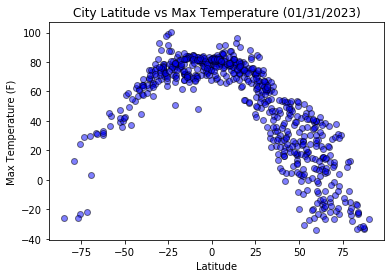

In [8]:
# Build scatter plot for latitude vs. temperature & Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_data_df["Latitude"]).astype(float), pd.to_numeric(weather_data_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

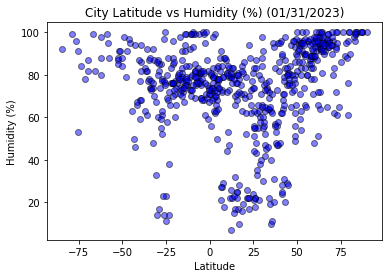

In [9]:
# Build the scatter plots for latitude vs. humidity & Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_data_df["Latitude"]).astype(float), pd.to_numeric(weather_data_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

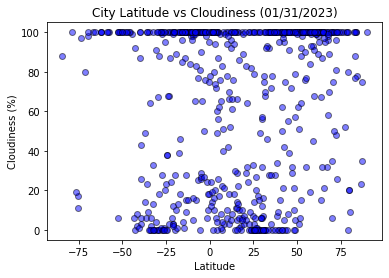

In [10]:
# Build the scatter plots for latitude vs. cloudiness & Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_data_df["Latitude"]).astype(float), pd.to_numeric(weather_data_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

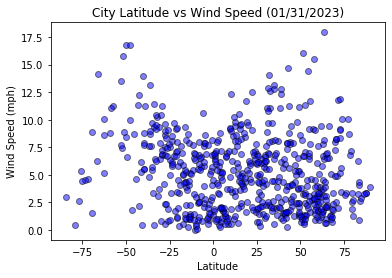

In [11]:
# Build the scatter plots for latitude vs. wind speed & Incorporate the other graph properties
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_data_df["Latitude"]).astype(float), pd.to_numeric(weather_data_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Latitude"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,oak ridge,US,2023-01-31 17:48:41,36.1376,-84.5159,100,95,33.188,1.96
1,buraydah,SA,2023-02-01 01:48:41,26.4193,44.9508,0,43,59.936,3.44
3,korla,CN,2023-02-01 06:48:42,37.6242,87.6527,100,57,13.694,4.84
7,konstantinovo,RU,2023-02-01 01:48:44,56.5161,37.972,100,96,24.548,2.77
10,ponta do sol,CV,2023-01-31 19:48:45,24.944,-40.7139,33,81,71.564,6.85


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Latitude"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
2,hithadhoo,MV,2023-02-01 04:48:42,-6.8497,70.8434,25,79,80.996,6.58
4,bluff,NZ,2023-02-01 11:48:43,-75.5773,169.771,11,53,24.548,5.37
5,san carlos de bariloche,AR,2023-01-31 19:48:43,-42.5346,-71.0071,0,46,57.092,2.16
6,saint-philippe,RE,2023-02-01 02:48:44,-36.04,57.9966,100,61,62.492,8.69
8,albany,AU,2023-02-01 04:48:45,-71.6173,99.1636,80,78,-22.054,4.6


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.32x + 91.68
The r-squared is: -0.8863923278054778


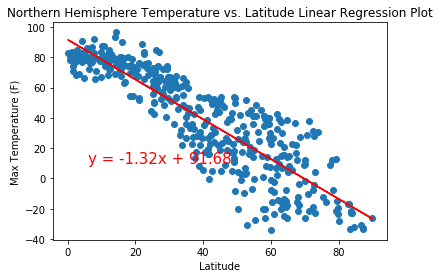

In [15]:
# Linear regression on Northern Hemisphere 
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Temperature vs. Latitude Linear Regression Plot')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

Regression line equation is: y = 0.86x + 89.82
The r-squared is: 0.7986829432769337


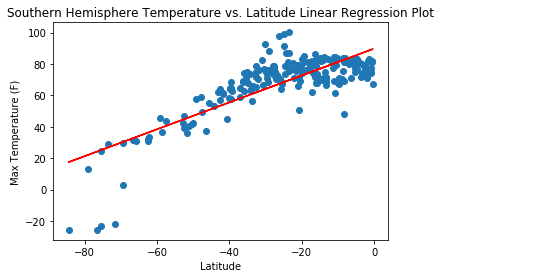

In [16]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Temperature vs. Latitude Linear Regression Plot')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
We can see a strong negative correlation between latitude and temperature for northern hemisphere, as you move away from the equator the temperature decreases.
We can see a moderate positive correlation between latitude and temperature for southern hemisphere, as you get closer to the equator the temperature increases

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.46x + 54.62
The r-squared is: 0.45716811834041526


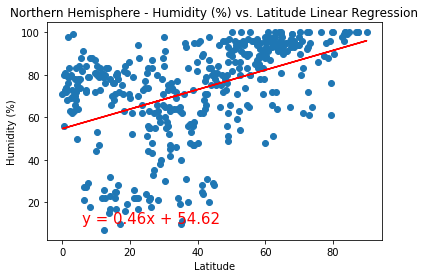

In [17]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

Regression line equation is: y = -0.07x + 75.12
The r-squared is: -0.07910959024300634


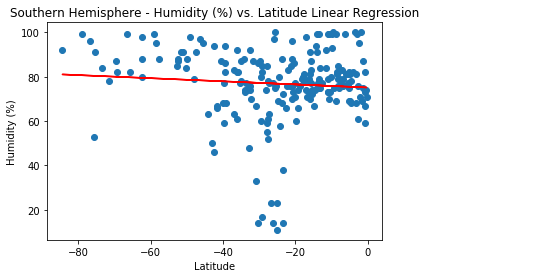

In [18]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
I could not see a display of much of a correlation between the data sets. Basead my opinion on this data I can see only a moderate positive correlation between latitude and max temperature for northern and southern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.58x + 41.68
The r-squared is: 0.3293571931776808


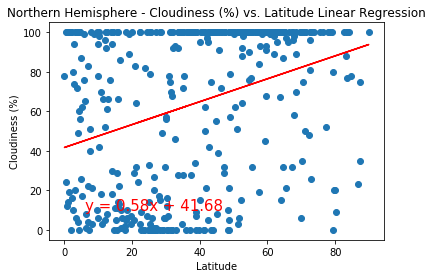

In [19]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()


Regression line equation is: y = 0.06x + 65.48
The r-squared is: 0.028058365445868153


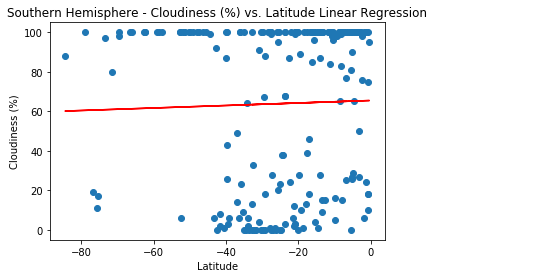

In [20]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
We can see only a weak positive correlation between latitude and cloudiness for northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.01x + 5.17
The r-squared is: -0.04697534751354726


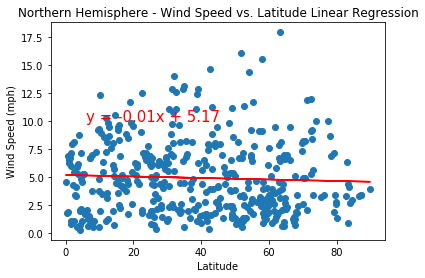

In [21]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

Regression line equation is: y = -0.07x + 4.03
The r-squared is: -0.34570671459934754


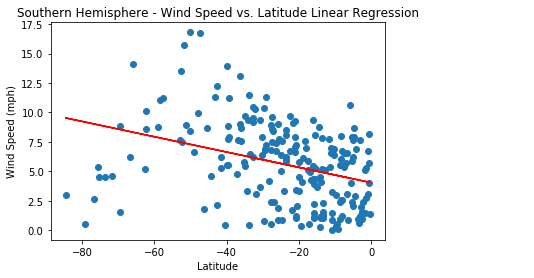

In [22]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**
I coud not see a display of much of a correlation between the data sets.